In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

# **Dataset** <br/> *Mobile app data, mood tracker*

---

In [2]:
# load data
data = pd.read_csv('data/mood_smartphone.csv')
data.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [3]:
# get unique id
print(f'Number of unique IDs: {len(data.id.unique())}')

Number of unique IDs: 27


In [4]:
data[data["variable"] == "screen"]

,Unnamed: 0,id,time,variable,value
39892,39893,AS14.01,2014-03-20 23:14:58.200,screen,58.846
39893,39894,AS14.01,2014-03-20 23:17:23.092,screen,9.217
39894,39895,AS14.01,2014-03-20 23:20:43.698,screen,19.829
39895,39896,AS14.01,2014-03-20 23:22:05.476,screen,483.510
39896,39897,AS14.01,2014-03-20 23:31:08.088,screen,812.907
...,...,...,...,...,...
136465,136466,AS14.33,2014-05-30 21:34:32.516,screen,133.394
136466,136467,AS14.33,2014-05-30 21:38:25.263,screen,164.072
136467,136468,AS14.33,2014-05-30 21:47:30.344,screen,504.017
136468,136469,AS14.33,2014-05-30 21:58:51.355,screen,526.137


In [5]:
data["variable"].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

| Column   | Description                               |
|----------|-------------------------------------------|
| id | The user the measurement originated from. |
| time | Timestamp of measurement entry. |
| variable | The measured variable (see table below). |
| value | The measurement. |


| Variable | Type (+ scale) | Description |
|----------|--------------|-------------|
| mood | Int (between 1 to 10)  | The mood scored by the user. |
| circumplex.arousal | Int (between -2 to 2) | The arousal scored by the user. |
| circumplex.valence | Int (between -2 to 2) | The valence scored by the user |
| activity | Float (between 0 and 1) | Activity score of the user |
| screen | Float (in unit time, note: unknown unit) | Duration of screen activity |
| call | Bool | Whether a call was made |
| sms | Bool | Wheter an sms was sent |
| appCat.builtin | Float (in units time) | Duration of usage of builtin apps |
| appCat.communication | Float (in units time) | Duration of usage of communication apps |
| appCat.entertainment | Float (in units time) | Duration of usage of entertainment apps |
*etc...*

# **Assignment I** <br/> *Predicting mood based on smartphone data*

---

## **Task 1a** <br/> *Exploratory data analysis*

---

Firstly, notice all sorts of properties of the dataset: 
1. how many records are there, 
2. how many attributes, 
3. what kinds of attributes are there, 
4. ranges of values, 
5. distribution of values, 
6. relationships between attributes, 
7. missing values, 
8. and so on...

A table is often a suitable way of showing such properties of a dataset. Notice if something is interesting (to you, or in general), make sure you write it down if you find something worth mentioning.

Secondly, make various plots of the data. 
1. Is there something interesting worth reporting? 
2. Report the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? 

Please select essential and interesting plots for discussion, as you have limited space for reporting your findings.

In [6]:
# superficial summary of the data
print(f'Number of measured variables: {len(data.variable.unique())}')  # check the number of unique variables
print(f'Number of participants: {len(data.id.unique())}')  # checks the number of unique id's
print(f'Number of entries: {len(data['variable'])}')  # checks the total number of observations
print(f'Number of missing values: {data.value.isnull().sum()}')  # checks the number of missing values

SyntaxError: f-string: unmatched '[' (487570320.py, line 4)

### **Generic**

---

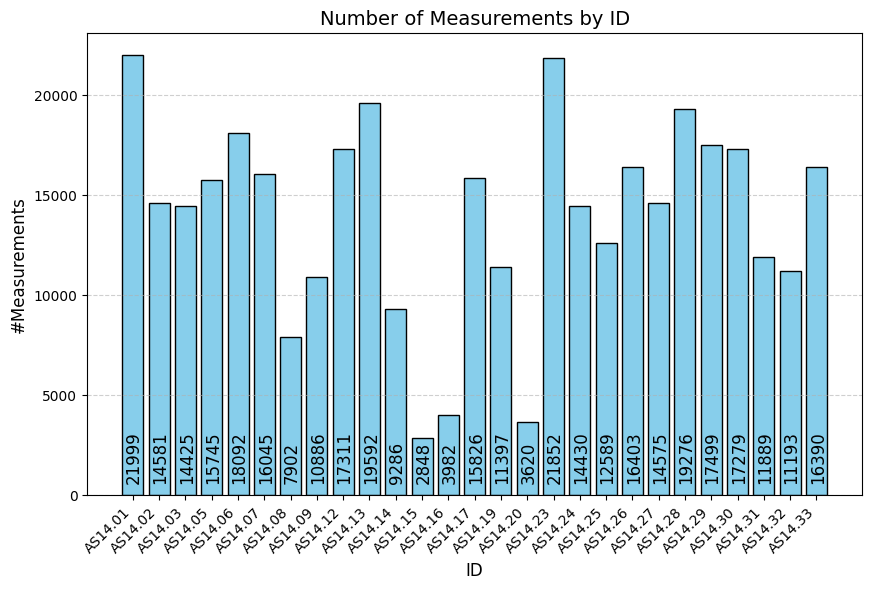

In [7]:
# plot
variable_entry_counts_by_id = data.groupby('id')['variable'].size()

plt.figure(figsize=(10, 6))
plt.title('Number of Measurements by ID', fontsize=14)
bars = plt.bar(variable_entry_counts_by_id.index, variable_entry_counts_by_id.values, color='skyblue', edgecolor='black') 

for bar, count in zip(bars, variable_entry_counts_by_id.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        750, 
        str(count), 
        rotation=90, 
        ha='center', 
        # color='white',
        fontsize=12
    )

plt.xlabel('ID', fontsize=12)
plt.ylabel('#Measurements', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
plt.show()

Categorical distribution of the variable column: 
variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64



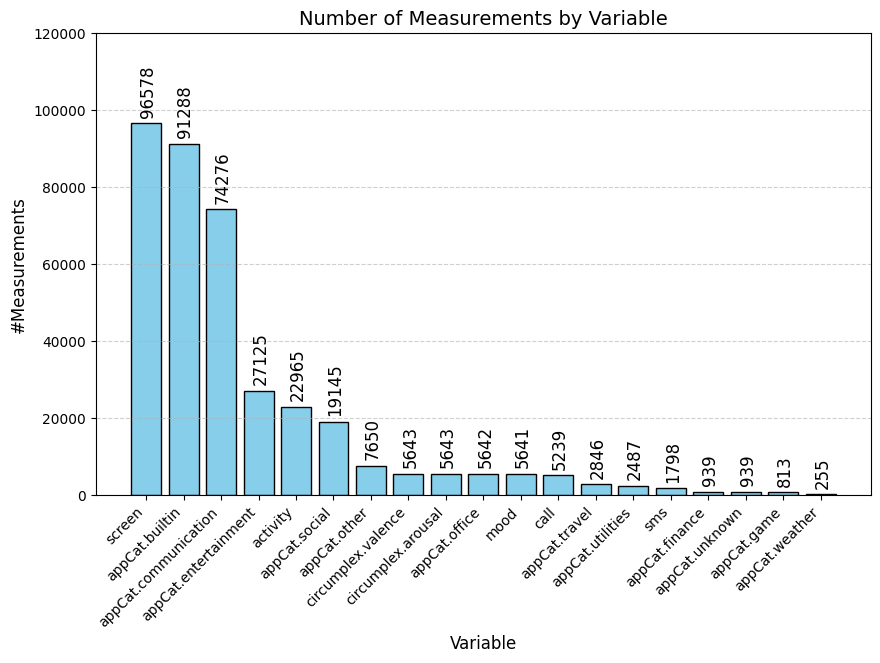

In [ ]:
# entries per variable
variable_entry_counts = data['variable'].value_counts()
print(f'Categorical distribution of the variable column: \n{variable_entry_counts}\n')  # check whether the variable measurements are balanced

# plot
plt.figure(figsize=(10, 6))
plt.title('Number of Measurements by Variable', fontsize=14)
bars = plt.bar(variable_entry_counts.index, variable_entry_counts.values, color='skyblue', edgecolor='black')

plt.ylim(0, 120_000)

for bar, count in zip(bars, variable_entry_counts.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        count + 2500, 
        str(count), 
        rotation=90, 
        ha='center', 
        # color='white',
        fontsize=12
    )

plt.xlabel('Variable', fontsize=12)
plt.ylabel('#Measurements', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
# plt.tight_layout()
plt.show()


### **Mood**

---

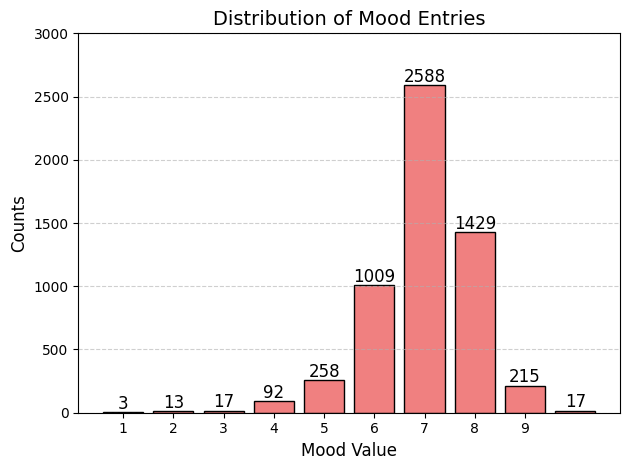

In [8]:
# mood data: summary statistics
mood_entries = data[data.variable == 'mood']

# get the frequency of each mood value
mood_value_counts = mood_entries['value'].value_counts()

bars = plt.bar(mood_value_counts.index, mood_value_counts.values, color='lightcoral', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, mood_value_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        count + 25, 
        str(count), 
        ha='center', 
        fontsize=12
    )


# styling
plt.title('Distribution of Mood Entries', fontsize=14)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel('Mood Value', fontsize=12)
plt.ylim(0, 3000)
plt.ylabel('Counts', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

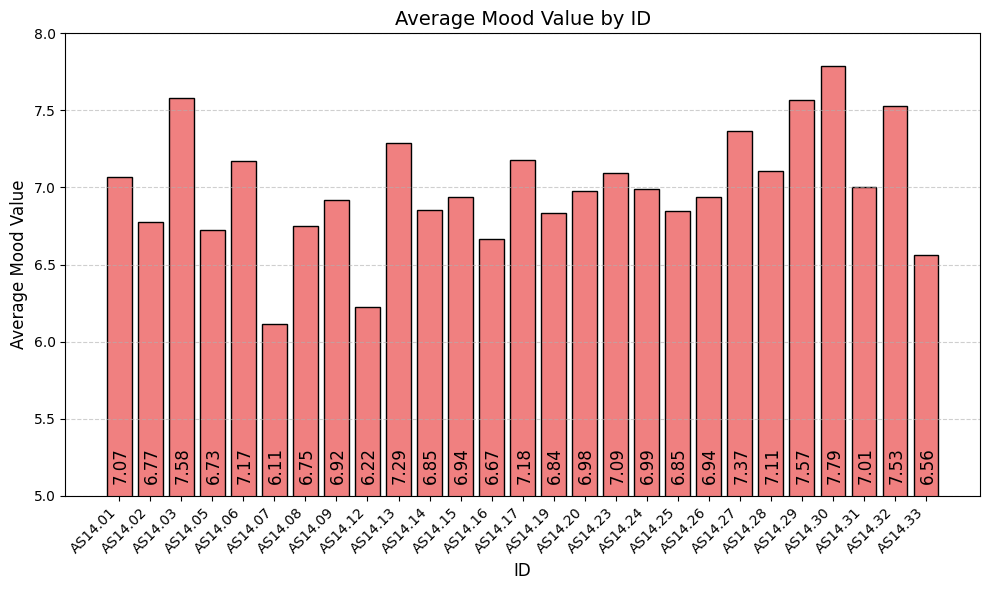

In [ ]:
# get the average mood value per participant
mood_avg = mood_entries.groupby('id')['value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Mood Value by ID', fontsize=14)
plt.ylim(5, 8)

bars = plt.bar(mood_avg.index, mood_avg.values, color='lightcoral', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, mood_avg.values):
    # plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{count:.2f}', ha='center', fontsize=12)
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        5.1, 
        f'{count:.2f}', 
        rotation=90, 
        ha='center', 
        fontsize=12
    )

# styling
plt.xlabel('ID', fontsize=12)
plt.ylabel('Average Mood Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()


### **Screen Time**

---

count    96578.000000
mean        75.335206
std        253.822497
min          0.035000
25%          5.322250
50%         20.044500
75%         62.540250
max       9867.007000
Name: value, dtype: float64
95th quantile of screen time: 278.783149981499


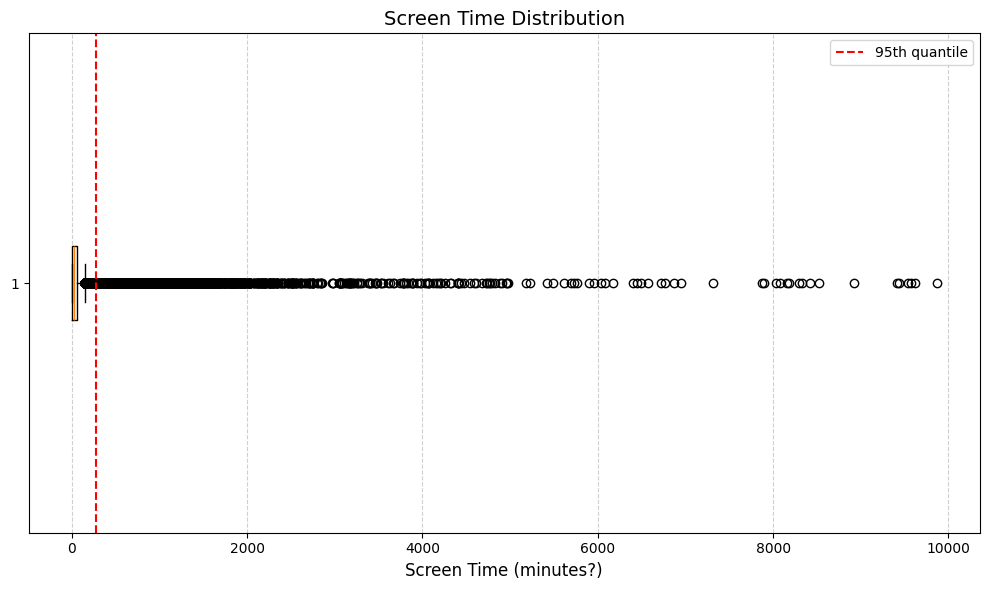

In [9]:
# screen data: summary statistics
screen_entries = data[data.variable == 'screen']

print(screen_entries['value'].describe())

# find the 0.95 quantile
q95 = screen_entries['value'].quantile(0.95)
print(f'95th quantile of screen time: {q95}')

# plot as a boxplot
plt.figure(figsize=(10, 6))
plt.title('Screen Time Distribution', fontsize=14)
plt.boxplot(screen_entries['value'], vert=False)
plt.xlabel('Screen Time (minutes?)', fontsize=12)
plt.axvline(q95, color='red', linestyle='--', label='95th quantile')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# find entries with screen time > 24 hours, possibly outliers
screen_entries[screen_entries['value'] > 24 * 60]

,Unnamed: 0,id,time,variable,value
39906,39907,AS14.01,2014-03-21 03:20:10.997,screen,1923.640
39915,39916,AS14.01,2014-03-21 10:10:03.170,screen,1967.283
40447,40448,AS14.01,2014-03-25 07:06:23.977,screen,1939.004
40536,40537,AS14.01,2014-03-25 18:41:51.733,screen,2671.164
40569,40570,AS14.01,2014-03-25 23:20:20.732,screen,2009.032
...,...,...,...,...,...
135971,135972,AS14.33,2014-05-24 18:18:03.135,screen,1576.822
136167,136168,AS14.33,2014-05-26 21:42:40.647,screen,9539.819
136307,136308,AS14.33,2014-05-28 18:32:26.480,screen,2975.105
136320,136321,AS14.33,2014-05-28 21:50:44.437,screen,1802.144


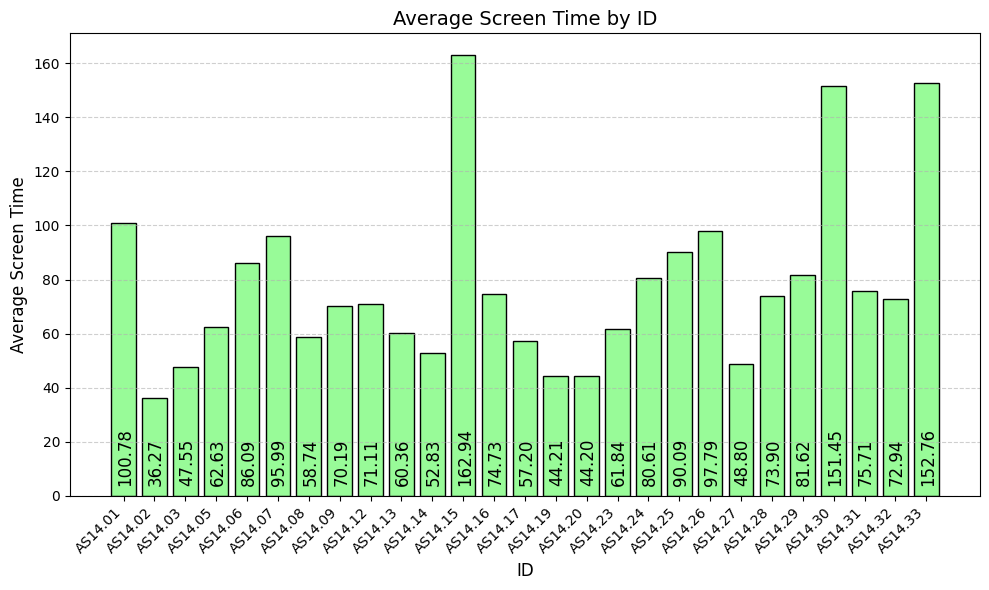

In [ ]:
# get the average screen time per participant
screen_avg = screen_entries.groupby('id')['value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Screen Time by ID', fontsize=14)
bars = plt.bar(screen_avg.index, screen_avg.values, color='palegreen', edgecolor='black')

# counts on top of bars
for bar, count in zip(bars, screen_avg.values):
    # plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{count:.2f}', ha='center', fontsize=12)
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        5, 
        f'{count:.2f}', 
        rotation=90, 
        ha='center', 
        fontsize=12
    )

# styling
plt.xlabel('ID', fontsize=12)
plt.ylabel('Average Screen Time', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### **Activity**

---

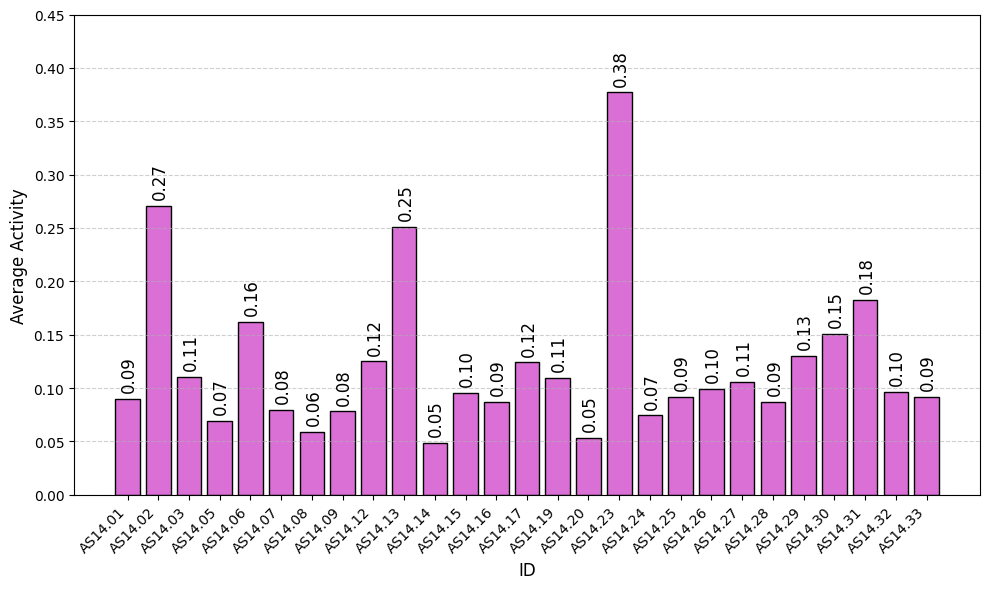

In [ ]:
# get the activity
activity_entries = data[data.variable == 'activity']

# get the average activity per participant
activity_avg = activity_entries.groupby('id')['value'].mean()

plt.figure(figsize=(10, 6))

bars = plt.bar(activity_avg.index, activity_avg.values, color='orchid', edgecolor='black')
plt.ylim(0, 0.45)
# counts on top of bars
for bar, count in zip(bars, activity_avg.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2 + 0.05, 
        count + 0.01, 
        f'{count:.2f}', 
        rotation=90, 
        ha='center', 
        fontsize=12
    )

# styling
plt.xlabel('ID', fontsize=12)
plt.ylabel('Average Activity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

### TODO for 1a

<div>
  <input type="checkbox" name="1">
  <label for="1">Some task.</label>
</div>
<div>
  <input type="checkbox" name="2" checked>
  <label for="chk">Example of a checked task.</label>
</div>

## **Task 1b** <br/> *Data cleaning*

---

As the insights from Task 1A will have shown, the dataset you analyze contains quite some noise. Values are sometimes missing, and extreme or incorrect values are seen that are likely outliers you may want to remove from the dataset. We will clean the dataset in two steps:

Firstly, we apply an approach to remove extreme and incorrect values from your dataset. Describe what your approach is, why you consider that to be a good approach, and describe what the result of applying the approach are.

Secondly, impute the missing values using two different approaches. Describe the approaches and study the impact of applying them to your data. Argue which one of the two approaches would be most suitable and select that one to form your cleaned dataset. Also base yourself on scientific literature for making your choice. 

**Advanced**: The advanced dataset contains a number of time series, select two approaches to impute missing values that are logical for such time series and argue for one of them based on the insights you gain. Also consider what to do with prolonged periods of missing data in a time series.

In [ ]:
# outlier detection

# seperate the data by variables
mood = data[data.variable == 'mood']
screen = data[data.variable == 'screen']
activity = data[data.variable == 'activity']
# TODO: add more variables

print(f'Based on the 3-sigma rule,')

# mood
mood_avg = mood['value'].mean()
mood_std = mood['value'].std()
mood_outliers = mood[(mood['value'] > mood_avg + 3 * mood_std) | (mood['value'] < mood_avg - 3 * mood_std)]
print(f'Mood outliers: {len(mood_outliers)}')

# screen
screen_avg = screen['value'].mean()
screen_std = screen['value'].std()
screen_outliers = screen[(screen['value'] > screen_avg + 3 * screen_std) | (screen['value'] < screen_avg - 3 * screen_std)]
print(f'Screen outliers: {len(screen_outliers)}')

# activity
activity_avg = activity['value'].mean()
activity_std = activity['value'].std()
activity_outliers = activity[(activity['value'] > activity_avg + 3 * activity_std) | (activity['value'] < activity_avg - 3 * activity_std)]
print(f'Activity outliers: {len(activity_outliers)}')

Based on the 3-sigma rule,
Mood outliers: 33
Screen outliers: 1100
Activity outliers: 503


In [ ]:
# find missing values
missing_values = data.isnull().sum()
print(f'Missing values, \n{missing_values}')

Missing values, 
Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64


## **Task 1c** <br/> *Feature engineering*

---

While we now have a clean dataset, we can still take one step before we move to classification or regression that can in the end help to improve performance, namely feature engineering. As discussed during the lectures, feature engineering is a creative process and can involve for example the transformation of values (e.g. take the log of values given a certain distribution of values) or combining multiple features (e.g. two features that are more valuable combined than the two separate values). 

Think of a creative feature engineering approach for your dataset, describe it, and apply it. Report on why you think this is a useful enrichment of your dataset.

**Advanced**: Essentially there are two approaches you can consider to create a predictive model using this dataset (which we will do in the next part of this assignment): 

1. Use a machine learning approach that can deal with temporal data (e.g. recurrent neural networks), or 

2. Aggregate the history somehow to create attributes that can be used in a more common machine learning approach (e.g. SVM, decision tree). For example, by aggregating the average
mood during the last five days as a predictor. 

Ample literature is present in the area of temporal data mining that describes how such a transformation can be made. For the feature engineering, you are going to focus on such a transformation in this part of the assignment.

This is illustrated in Figure 1.

![Predictive model](assignment/figure_1.png)

In the end, we end up with a dataset with a number of training instances per patient (as you have a number of time points for which you can train), i.e. an instance that concerns the mood at t=1, t=2, etc. Of course it depends on your choice of the history you consider relevant from what time point you can start predicting (if you use a windows of 5 days of history to create attributes you cannot create training instances before the 6th day). To come to this dataset, you need to:
1. Define attributes that aggregate the history, draw inspiration from the scientific literature.
2. Define the target by averaging the mood over the entire day.
3. Create an instance-based dataset as described in Figure 1.

In [10]:
# Aggregate mood values by day for each ppn
data['time'] = pd.to_datetime(data['time'])
data['date'] = data['time'].dt.date
daily_mood = data[data['variable'] == 'mood'].groupby(['id', 'date']).agg(daily_mood=('value', 'mean')).reset_index()

# Aggregated mood data
daily_mood.head()


,id,date,daily_mood
0,AS14.01,2014-02-26,6.250000
1,AS14.01,2014-02-27,6.333333
2,AS14.01,2014-03-21,6.200000
3,AS14.01,2014-03-22,6.400000
4,AS14.01,2014-03-23,6.800000


In [12]:
# Define a function to calculate rolling features individually
def calculate_rolling_features(grouped_data, feature_name, window_size=6):  # Window size is 6 (today and last five days)
    return grouped_data.rolling(window=window_size, min_periods=5).agg({
        'mean': lambda x: x.shift(1).mean(),
        'min': lambda x: x.shift(1).min(),
        'max': lambda x: x.shift(1).max(),
        'std': lambda x: x.shift(1).std()
    }).rename(columns={
        'mean': f'avg_{feature_name}_last_5_days',
        'min': f'min_{feature_name}_last_5_days',
        'max': f'max_{feature_name}_last_5_days',
        'std': f'std_{feature_name}_last_5_days'
    })

# Calculate rolling window features for mood
mood_features = calculate_rolling_features(daily_mood.groupby('id')['daily_mood'], 'mood')

# Combine the features with the daily mood data
daily_mood_features = pd.concat([daily_mood.reset_index(drop=True), mood_features.reset_index(drop=True)], axis=1)
daily_mood_features.head(10)  # First 10 rows


,id,date,daily_mood,avg_mood_last_5_days,min_mood_last_5_days,max_mood_last_5_days,std_mood_last_5_days
0,AS14.01,2014-02-26,6.250000,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-27,6.333333,NaN,NaN,NaN,NaN
2,AS14.01,2014-03-21,6.200000,NaN,NaN,NaN,NaN
3,AS14.01,2014-03-22,6.400000,NaN,NaN,NaN,NaN
4,AS14.01,2014-03-23,6.800000,6.295833,6.2,6.4,0.088585
5,AS14.01,2014-03-24,6.000000,6.396667,6.2,6.8,0.238164
6,AS14.01,2014-03-25,6.750000,6.346667,6.0,6.8,0.295898
7,AS14.01,2014-03-26,6.600000,6.430000,6.0,6.8,0.345688
8,AS14.01,2014-03-27,7.000000,6.510000,6.0,6.8,0.324808
9,AS14.01,2014-03-28,6.400000,6.630000,6.0,7.0,0.380132


In [13]:
# Aggregate selected variables by day for each patient
list_features = ['circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'appCat.communication', 'appCat.entertainment', 'appCat.social']
daily_aggregates = data[data['variable'].isin(list_features)].groupby(['id', 'date', 'variable']).agg(daily_average=('value', 'mean')).reset_index()

# Pivot the aggregated data so each variable becomes a column
daily_pivoted = daily_aggregates.pivot_table(index=['id', 'date'], columns='variable', values='daily_average').reset_index()

# Merge the pivoted data with the daily mood data to get a single dataframe with all features and the target
full_data = daily_mood_features.merge(daily_pivoted, on=['id', 'date'], how='left')

# Display the merged dataset structure
full_data.head()


,id,date,daily_mood,avg_mood_last_5_days,min_mood_last_5_days,max_mood_last_5_days,std_mood_last_5_days,activity,appCat.communication,appCat.entertainment,appCat.social,circumplex.arousal,circumplex.valence,screen
0,AS14.01,2014-02-26,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,0.750000,NaN
1,AS14.01,2014-02-27,6.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.333333,NaN
2,AS14.01,2014-03-21,6.200000,NaN,NaN,NaN,NaN,0.134050,55.095526,53.024000,75.141667,0.20,0.200000,153.665872
3,AS14.01,2014-03-22,6.400000,NaN,NaN,NaN,NaN,0.236880,51.697062,46.662000,36.636000,0.60,0.500000,47.613651
4,AS14.01,2014-03-23,6.800000,6.295833,6.2,6.4,0.088585,0.142741,53.442031,31.448667,50.046611,0.20,0.800000,67.067644


## **Task 2a** <br/> *Application of classification algorithms*

---

1. Identify the target (i.e. the class you want to predict) for your dataset.
2. Split up your data in a train and test set and apply two classification algorithms, at least one of them should have been discussed during the lectures. 
3. Optimize the hyperparameters of the approaches. 
4. Measure and discuss the performance using a performance metric and argue why that is a suitable metric. 
5. Describe all steps in your process clearly and fully to make sure it is reproducible.

**Advanced**: For the advanced assignment you go through the same steps (and shape it into a classification problem for predicting the mood of the next day), however you are required to use two different types of classification algorithms, namely one that uses the dataset you formed in Task 1C (e.g. using a random forest) and an algorithm that is inherently temporal (e.g. recurrent neural networks). Also consider a good evaluation setup given the nature of the dataset.

In [14]:
# Option for handling NaN values - fill with 0 for simplicity (alternative approaches could involve imputation strategies)
full_data_filled = full_data.fillna(0)

# Update list_features
predictors = list_features.copy()
predictors.append('avg_mood_last_5_days')

# Define features (X) with the newly added variables and target (y)
X_enhanced = full_data_filled[predictors]
y_enhanced = full_data_filled['daily_mood']

# Split the enhanced data into training and testing sets
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(X_enhanced, y_enhanced, test_size=0.2, random_state=42)

# Normalize enhanced features
scaler_enhanced = StandardScaler().fit(X_train_enhanced)
X_train_scaled_enhanced = scaler_enhanced.transform(X_train_enhanced)
X_test_scaled_enhanced = scaler_enhanced.transform(X_test_enhanced)

# Re-train an SVM model with the enhanced feature set
model_enhanced = SVR()
model_enhanced.fit(X_train_scaled_enhanced, y_train_enhanced)

# Predict on the testing set with the enhanced model
y_pred_enhanced = model_enhanced.predict(X_test_scaled_enhanced)

# Evaluate the enhanced model
mae_enhanced = mean_absolute_error(y_test_enhanced, y_pred_enhanced)
r2_enhanced = r2_score(y_test_enhanced, y_pred_enhanced)

mae_enhanced, r2_enhanced


(0.3701700189226422, 0.5194832394088391)

## **Task 2b** <br/> *Winning classification algorithms*

---

Machine learning techniques that are used in Data Mining projects develop quickly these
days. One nice way to track these developments is to see which algorithms win competitions
on websites such as Kaggle. Your task is to describe the approach of the winner of one of those
competitions that focus on a classification tasks. The following sites might serve as starting
points:
- http://www.kaggle.com/ - DM competitions
- https://www.kdd.org/kdd-cup - KDD Cup
- Etc. --> You should be able to find other relevant competitions by searching the Web.

The main goal is that you can demonstrate that you understand a technique that beats other techniques under certain conditions (specified by the task and data at hand). 

Here’s what we’d like you to include in the report for this task:

1. A description of the competition: what competition, when was it held, what data they were using, what task(s) they were solving, what evaluation measure(s) they used.
2. Who was the winner, what technique did they use?
3. What was the main idea of the winning approach? (Typically this would come from a paper written by the winners.)
4. What makes the winning approach stand out, or how is it different from standard, or non-winning methods?

Particular rules and points to consider:
- A suggestion: 1 page should be more than enough for this task.
- Needless to say, but for the record, please do not copy and paste from papers. Always cite (properly) the source of the paper you are using.

## **Task 3** <br/> *Association rules*

---

We have seen the APRIORI algorithm during the lecture that targets finding associations in datasets, predicting that an item is likely to be bought given other items that are in the shopping basket already. As mentioned during the lecture, many innovations have been made to improve the APRIORI and other methods. One category of improvements involves grouping of products into higher level product categories (e.g. a Pizza Margherita and Pizza Quattro Formaggio are both pizza’s). 

Find an approach that aims to do this and describe it. Discuss the pros and cons of such an approach.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_csv('data/mood_smartphone.csv')

# Focus on 'mood' and 'appCat.*' variables for this simplified example
relevant_columns = ['id', 'time', 'variable', 'value']
data = data[data['variable'].str.contains('mood|appCat')]

# Convert timestamps to dates for daily aggregation, ignoring time
data['date'] = pd.to_datetime(data['time']).dt.date
data.drop('time', axis=1, inplace=True)

# Pivot the table to get daily entries per user with variables as columns
pivoted_data = data.pivot_table(index=['id', 'date'], columns='variable', values='value', aggfunc='sum').reset_index()

# Fill missing values (indicating no usage) with 0
pivoted_data.fillna(0, inplace=True)

# Categorize app usage into high or low based on the median usage for each app category
for col in pivoted_data.columns:
    if col.startswith('appCat'):
        median_val = pivoted_data[col].median()
        pivoted_data[col] = ['high' if val > median_val else 'low' for val in pivoted_data[col]]

# Create transactions: Each row is considered a 'transaction' of high/low usage categories
transactions = pivoted_data.drop(['id', 'date'], axis=1).values.tolist()

# Encode transactions for association analysis
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data_transactions = pd.DataFrame(te_ary, columns=te.columns_)

# Use APRIORI algorithm to find frequent itemsets
frequent_itemsets = apriori(data_transactions, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


TypeError: '<' not supported between instances of 'str' and 'float'

## **Task 4** <br/> *Numerical prediction*

---

Similar to Task 2A, apply two machine learning algorithms to your dataset, but now focus on predicting a numerical target (i.e. a regression problem). Describe similar details as you have for the classification problem. Highlight the differences you see between the two types of prediction tasks.

## **Task 5a** <br/> *Characteristics of evaluation metrics*

---

Consider the following two error measures: mean squared error (MSE) and mean absolute
error (MAE).

1. Write down their corresponding formulae.
2. Discuss: Why would someone use one and not the other?
3. Describe an example situation (dataset, problem, algorithm perhaps) where using MSE or MAE would give identical results. Justify your answer (some maths may come handy, but clear explanation is also sufficient).

## **Task 5b** <br/> *Impact of evaluation metrics*

---

Apply the MSE and MAE as evaluation metrics to the numerical prediction problem you have worked on under Task 4. Describe how the model behaves under the different characteristics and describe the implications.